In [1]:
# import required packages
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import os
pd.set_option('display.max_rows', None)  # or replace None with



# Load in the data

dir = os.getcwd()
file_path = dir + "/2021plus_data_v1.csv" 
data = pd.read_csv(file_path)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
/var/folders/fs/g9ydf4hn48ng21n8dv53yt380000gn/T/ipykernel_69740/2627412933.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


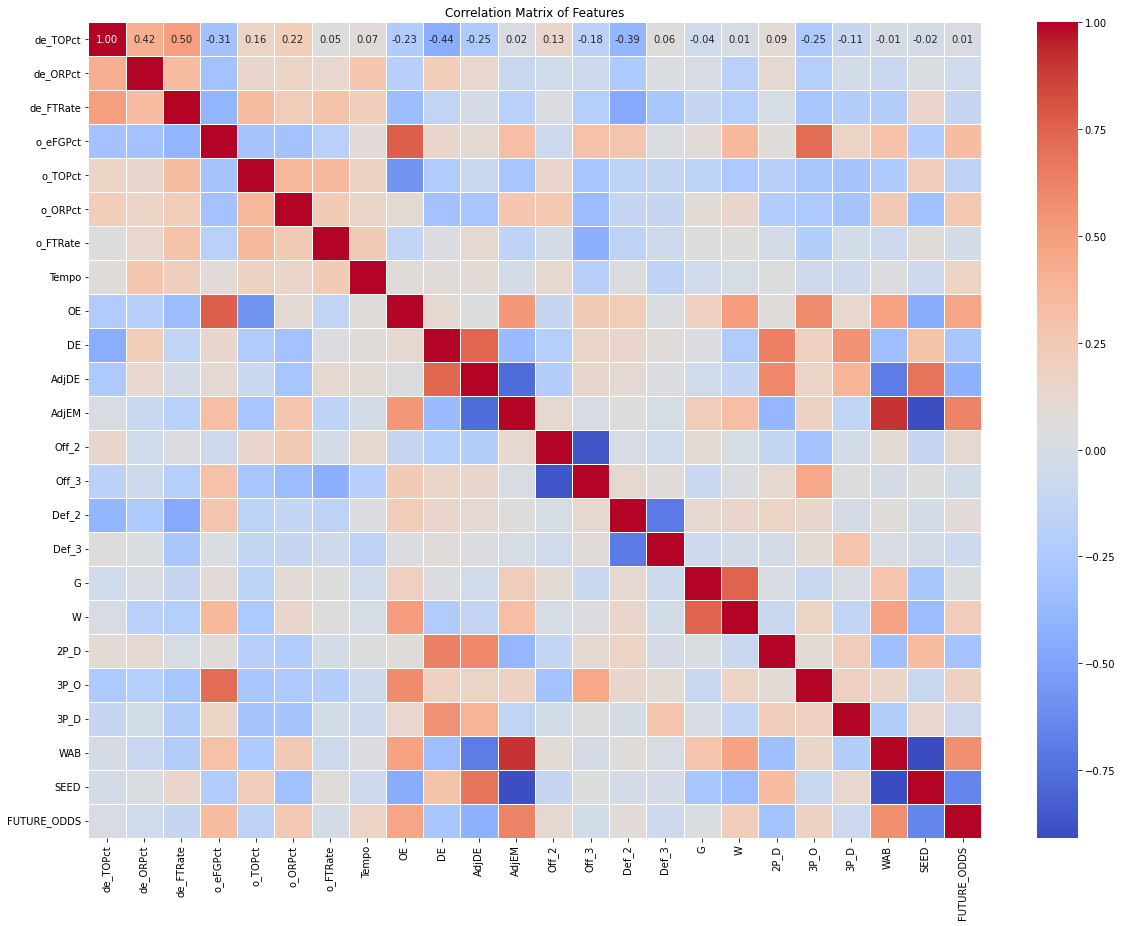

In [2]:
from sklearn.preprocessing import StandardScaler

# Extracting numerical features, excluding 'Season' as it's more of an identifier than a feature
numerical_features = data.select_dtypes(include=['float64', 'int64']).drop(['Season'], axis=1)

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

# Creating a new DataFrame for the scaled features
scaled_features_df = pd.DataFrame(scaled_features, columns=numerical_features.columns)

# Computing the correlation matrix
correlation_matrix = scaled_features_df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(20, 15))
# Here, annot=True to show the correlation values. Multiply by 100 and format to display as percentage.
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.show()

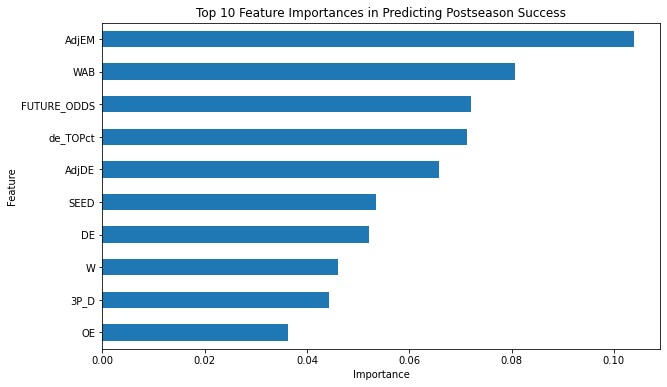

Training Accuracy: 1.0
Test Accuracy: 0.8225806451612904


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

temp = data
temp['Success'] = temp['POSTSEASON'].apply(lambda x: 1 if x in ['S16', 'E8', 'F4', '2ND', 'Champions'] else 0)

features = ['de_TOPct', 'de_ORPct', 'de_FTRate', 'o_eFGPct',
            'o_TOPct', 'o_ORPct', 'o_FTRate', 'Tempo', 'OE', 'DE', 'AdjDE', 'AdjEM',
            'Off_2', 'Off_3', 'Def_2', 'Def_3', '2P_D', '3P_O',
            '3P_D', 'WAB', 'SEED', 'W', 'FUTURE_ODDS']

# Preparing the features and target variable
X = temp[features]  # Using the same features as before
y = temp['Success']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fitting a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predicting on the test set and calculating accuracy
y_pred = rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

# Getting feature importances and selecting the top 10
feature_importances = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)
top_10_features = feature_importances.head(10)

# Plotting top 10 feature importances
plt.figure(figsize=(10, 6))
top_10_features.sort_values().plot(kind='barh')
plt.title('Top 10 Feature Importances in Predicting Postseason Success')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Predicting on the training set and calculating accuracy
y_train_pred = rf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')


In [4]:
data_2021plus = data
file_path = dir + "/2024_data_v4.csv" 
data_2024 = pd.read_csv(file_path)


In [30]:
common_features = ['Tempo', 'OE', 'DE', 'AdjDE', 'AdjEM', 'SEED', 'G', 'W', 'FUTURE_ODDS']
X = data_2021plus[common_features]
y = data_2021plus['POSTSEASON']


from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
# model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

model.fit(X_train, y_train)


from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

from sklearn.model_selection import cross_val_score

# Example using cross-validation with 5 folds
scores = cross_val_score(model, X, y_encoded, cv=5)
print("Cross-validated scores:", scores)

X_2024 = data_2024[common_features]
predictions_2024 = model.predict(X_2024)
predictions_2024 = label_encoder.inverse_transform(predictions_2024)

# Add predictions to the 2024 data
data_2024['POSTSEASON'] = predictions_2024


print(data_2024[['TeamName', 'POSTSEASON']])




Accuracy: 0.43902439024390244


/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Cross-validated scores: [0.48780488 0.53658537 0.53658537 0.46341463 0.375     ]
            TeamName POSTSEASON
0              Akron        R64
1            Alabama        R32
2            Arizona        R64
3             Auburn        R32
4             Baylor        R64
5          Boise St.        R64
6                BYU        R64
7         Charleston        R64
8            Clemson        R32
9            Colgate        R64
10          Colorado        R64
11      Colorado St.        R64
12       Connecticut        R64
13         Creighton        R64
14            Dayton        R32
15             Drake        R64
16              Duke        R64
17          Duquesne        R64
18           Florida        R32
19  Florida Atlantic        R64
20           Gonzaga        R64
21     Grambling St.        R68
22      Grand Canyon        R64
23           Houston        S16
24            Howard        R32
25          Illinois        R64
26          Iowa St.        S16
27     James Madison   

In [40]:
# Example DataFrame for probabilities (you should replace this with your actual probabilities DataFrame)
prob_df = pd.DataFrame(model.predict_proba(X_2024), columns=model.classes_)

# Assuming the mapping from model classes (integers) to postseason rounds is as follows:
# This mapping needs to be adjusted based on your specific model's training
postseason_mapping = {
    0: 'R68',
    1: 'R64',
    2: 'R32',
    3: 'S16',
    4: 'E8',
    5: 'F4',
    6: '2ND',
    7: 'Champion'
}

# Now, we need to use this mapping to adjust our dataframe and allocation logic:
data_2024['POSTSEASON'] = None  # Initialize or reset the POSTSEASON column

# Adjust the slots dictionary to use integers, matching 'prob_df' columns
slots = {7: 1, 6: 1, 5: 2, 4: 4, 3: 8, 2: 16, 1: 32, 0: 4}

# Adjust the loop to use the mapped rounds
for index, num_slots in slots.items():
    round_ = postseason_mapping[index]  # Use the mapping to get the round name
    unallocated_mask = data_2024['POSTSEASON'].isnull()
    round_probs = prob_df.loc[unallocated_mask, index]  # Use integer index for prob_df

    # Allocate teams to this round based on the top probabilities
    top_indices = round_probs.nlargest(num_slots).index
    data_2024.loc[top_indices, 'POSTSEASON'] = round_

# Verify allocation
assert data_2024['POSTSEASON'].isnull().sum() == 0, "Some teams have not been allocated a POSTSEASON."

print(data_2024[['TeamName', 'POSTSEASON']])


            TeamName POSTSEASON
0              Akron        R64
1            Alabama        S16
2            Arizona        R32
3             Auburn        S16
4             Baylor        S16
5          Boise St.        R64
6                BYU        R32
7         Charleston        R64
8            Clemson        R32
9            Colgate        R64
10          Colorado        R32
11      Colorado St.        R64
12       Connecticut        R32
13         Creighton        R32
14            Dayton        R32
15             Drake        R64
16              Duke        R32
17          Duquesne        R64
18           Florida        S16
19  Florida Atlantic        S16
20           Gonzaga        R32
21     Grambling St.        R64
22      Grand Canyon        R64
23           Houston        S16
24            Howard        R64
25          Illinois        S16
26          Iowa St.   Champion
27     James Madison        R64
28            Kansas         E8
29          Kentucky        S16
30    Lo